<h1 > 
    <center> Project - Statistical Methods for Decision Making
    </center>
</h1>

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

<h2> 
    <center> Problem 1 - Wholesale Customers Analysis
    </center>
</h2>

In [5]:
df_1 = pd.read_csv("Wholesale+Customers+Data.csv")

In [6]:
df_1.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


**1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?**

In [7]:
df_1.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [8]:
df_1.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [9]:
df_1['Total'] = df_1['Fresh']+df_1['Milk']+df_1['Grocery']+df_1['Frozen']+df_1['Detergents_Paper']+df_1['Delicatessen']

In [10]:
df_1.groupby("Region").sum()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
Region,,,,,,,,
Lisbon,18095,854833,422454,570037,231026,204136,104327,2386813
Oporto,14899,464721,239144,433274,190132,173311,54506,1555088
Other,64026,3960577,1888759,2495251,930492,890410,512110,10677599


In [11]:
df_1.groupby("Channel").sum()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
Channel,,,,,,,,
Hotel,71034,4015717,1028614,1180717,1116979,235587,421955,7999569
Retail,25986,1264414,1521743,2317845,234671,1032270,248988,6619931


**1.1 Inference: The "Other" Region has spent the most. The "Hotel" Channel has spent the most.**

**1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.**

In [15]:
df_1.groupby("Region").sum().iloc[:,1:]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
Region,,,,,,,
Lisbon,854833,422454,570037,231026,204136,104327,2386813
Oporto,464721,239144,433274,190132,173311,54506,1555088
Other,3960577,1888759,2495251,930492,890410,512110,10677599


In [16]:
df_1.groupby("Region").mean().iloc[:,1:]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
Region,,,,,,,
Lisbon,11101.727273,5486.415584,7403.077922,3000.337662,2651.116883,1354.896104,30997.571429
Oporto,9887.680851,5088.170213,9218.595745,4045.361702,3687.468085,1159.702128,33086.978723
Other,12533.471519,5977.085443,7896.363924,2944.594937,2817.753165,1620.601266,33789.870253


In [17]:
df_1.groupby("Channel").sum().iloc[:,1:]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
Channel,,,,,,,
Hotel,4015717,1028614,1180717,1116979,235587,421955,7999569
Retail,1264414,1521743,2317845,234671,1032270,248988,6619931


In [19]:
df_1.groupby("Channel").mean().iloc[:,1:]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
Channel,,,,,,,
Hotel,13475.560403,3451.724832,3962.137584,3748.251678,790.560403,1415.956376,26844.191275
Retail,8904.323944,10716.500000,16322.852113,1652.612676,7269.507042,1753.436620,46619.232394


**1.2 Inference:**

- Across all regions the "Other" Region has the most sales, followed by Lisbon.
- The Fresh Variety is most popular, followed by Grocery.
- In the Hotel channel - Fresh is the most popular varity, whereas in Retail - Delicatessen is the most popular cateogry.

**1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?**

In [170]:
print("Coefficient of Variation of Fresh is "+str(stats.variation(df_1.iloc[:,1:]["Fresh"])))
print("Coefficient of Variation of Milk is "+str(stats.variation(df_1.iloc[:,1:]["Milk"])))
print("Coefficient of Variation of Grocery is "+str(stats.variation(df_1.iloc[:,1:]["Grocery"])))
print("Coefficient of Variation of Frozen is "+str(stats.variation(df_1.iloc[:,1:]["Frozen"])))
print("Coefficient of Variation of Detergents_Paper is "+str(stats.variation(df_1.iloc[:,1:]["Detergents_Paper"])))
print("Coefficient of Variation of Delicatessen is "+str(stats.variation(df_1.iloc[:,1:]["Delicatessen"])))

Coefficient of Variation of Fresh is 1.0527196084948243
Coefficient of Variation of Milk is 1.27185083074245
Coefficient of Variation of Grocery is 1.1938154477492668
Coefficient of Variation of Frozen is 1.578535529860776
Coefficient of Variation of Detergents_Paper is 1.6527657881041735
Coefficient of Variation of Delicatessen is 1.8473041039189302


**1.3 Inference:**

Most inconsistent is - Delicatessen

Least inconsistent is - Fresh

**1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.**

<AxesSubplot:>

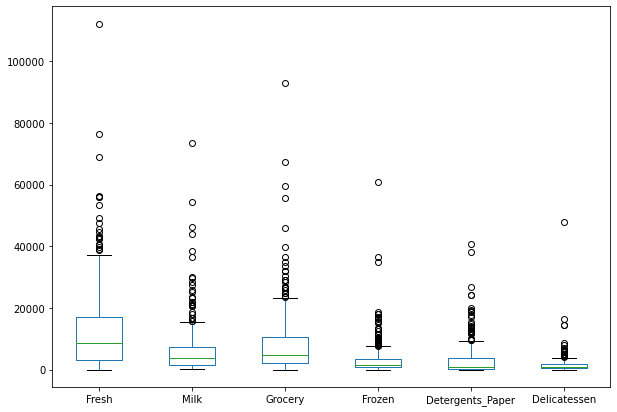

In [42]:
df_1.iloc[:,1:9].plot(kind='box', figsize=(10,7))

**1.4 Inference: It is very clearly visible from the boxplot that all the numerical columns have outliers.**

**1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective**

**1.5 Inferece:**

- The Other Region and Hotel Channel are the maximum spenders. More supply centers should be build close to them.
- In the Hotel channel - Fresh is the most popular varity, whereas in Retail - Delicatessen is the most popular cateogry.In the respective channels we must focus on strengthening the supply even more.
- There is a lot of inconsistency in the behaviour, which is a negative sign. This should be corrected.

<h2> 
    <center> Problem 2 - Clear Mountain State University (CMSU) Survey Analysis
    </center>
</h2>

In [50]:
df_2 = pd.read_csv("Survey-1.csv")

In [51]:
df_2.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


**2.1. For this data, construct the following contingency tables (Keep Gender as row variable)**

**2.1.1. Gender and Major**

In [59]:
gender_major = pd.crosstab(df_2['Gender'], df_2['Major'], margins = False)
gender_major

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


**2.1.2. Gender and Grad Intention**

In [61]:
gender_gradintent = pd.crosstab(df_2['Gender'], df_2['Grad Intention'], margins = False)
gender_gradintent

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


**2.1.3. Gender and Employment**

In [62]:
gender_employment = pd.crosstab(df_2['Gender'], df_2['Employment'], margins = False)
gender_employment

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


**2.1.4. Gender and Computer**

In [63]:
gender_comp = pd.crosstab(df_2['Gender'], df_2['Computer'], margins = False)
gender_comp

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


**2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:**

**2.2.1. What is the probability that a randomly selected CMSU student will be male?**

In [68]:
df_2[df_2.Gender=="Male"]["ID"].count()/df_2["ID"].count()

0.46774193548387094

**2.2.2. What is the probability that a randomly selected CMSU student will be female?**

In [69]:
df_2[df_2.Gender=="Female"]["ID"].count()/df_2["ID"].count()

0.532258064516129

**2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:**

**2.3.1. Find the conditional probability of different majors among the male students in CMSU.**

In [83]:
#Probability given Gender = Male
gender_major.iloc[1:,:]/gender_major.iloc[1:,:].sum(axis=1)[0]

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Male,0.137931,0.034483,0.137931,0.068966,0.206897,0.137931,0.172414,0.103448


**2.3.2 Find the conditional probability of different majors among the female students of CMSU.**

In [85]:
#Probability given Gender = Female
gender_major.iloc[0:1,:]/gender_major.iloc[0:1,:].sum(axis=1)[0]

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,0.090909,0.090909,0.212121,0.121212,0.121212,0.090909,0.272727,0.0


**2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:**

**2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.**

In [93]:
gender_gradintent.iloc[1:,2:]/gender_gradintent.iloc[1:].sum(axis=1)[0]

Grad Intention,Yes
Gender,
Male,0.586207


**2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop.**

In [97]:
1-gender_comp.iloc[0:1,1:2]/gender_comp.iloc[0:1].sum(axis=1)[0]

Computer,Laptop
Gender,
Female,0.121212


**2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:**



**2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?**



In [101]:
gender_employment

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [115]:
((7+19+3)+(3+7)-(7))/(3+7+24+19+6+3)

0.5161290322580645

**2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.**

In [118]:
gender_major.iloc[0:1]

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0


In [119]:
(4+4)/(3+3+7+4+4+3+9+0)

0.24242424242424243

**2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?**

In [122]:
gender_gradintent.drop(["Undecided"], axis =1)

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


**2.6 Inference: For independent events: P(A∩B) = P(A) · P(B)**

Here let us consider A = female, B = Graduation Intention

P(A∩B)=11/40
P(A)=20/40
P(B)=28/40

P(A∩B)=11/40=0.275
P(A)·P(B) = 0.35

Hence it can be concluded that these events are **NOT independent**.

**2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.**

**2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?**

In [126]:
df_2[df_2["GPA"]<3].count()[0]/df_2.count()[0]

0.27419354838709675

**2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.**

In [138]:
df_2[df_2["Gender"]=="Male"][df_2["Salary"]>50].count()[0]/df_2[df_2["Gender"]=="Male"].count()[0]

0.3448275862068966

In [139]:
df_2[df_2["Gender"]=="Female"][df_2["Salary"]>50].count()[0]/df_2[df_2["Gender"]=="Female"].count()[0]

0.3939393939393939

**2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions for this whole Problem 2.**

<AxesSubplot:ylabel='Frequency'>

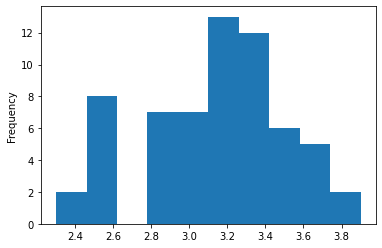

In [142]:
df_2["GPA"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

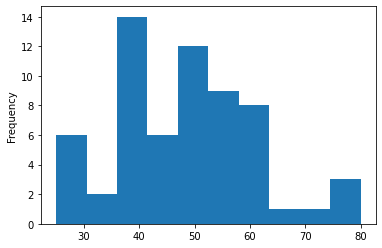

In [143]:
df_2["Salary"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

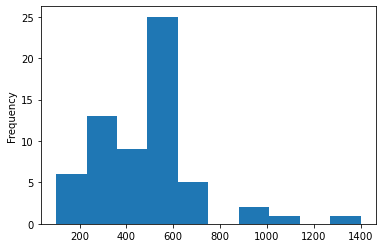

In [144]:
df_2["Spending"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

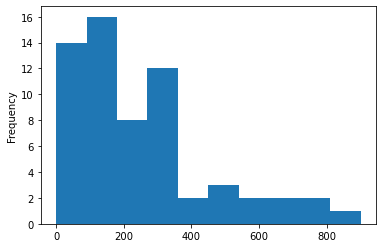

In [145]:
df_2["Text Messages"].plot.hist()

**2.8 Inference:**

It can be concluded that GPA and Salary are Normal Distributions, whereas Spending and Text Messages are not.

Overall the following conclusions can be made about the data:

- Female students constitute approximately 53.2% of the college.
- Most popular Majors for Male students are: Management and Retailing/Marketing.
- Most popular Majors for Male students are: Retailing/Marketing and Economics/Finance.
- CIS and Accounting are the least popular among Male and Female.
- Gender and Intent to Graduate are not independent events.

<h2> 
    <center> Problem 3 - ABC Asphalt Shingles
    </center>
</h2>

**3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.**

In [149]:
df_3 = pd.read_csv("A+&+B+shingles.csv")

In [155]:
t_statistic, p_value = stats.ttest_1samp(df_3.A, 0.35)
print('t statistic: {0} p value: {1} '.format(t_statistic, p_value/2))

t statistic: -1.4735046253382782 p value: 0.07477633144907513 


**Inference: As p values > 0.05, we can't reject H0, there is NOT ENOUGH evidence to conclude: moisture contents in Sample A shingles are within the permissible limits**

In [153]:
t_statistic, p_value = stats.ttest_1samp(df_3.B, 0.35,nan_policy='omit' )

In [154]:
print('t statistic: {0} p value: {1} '.format(t_statistic, p_value/2))

t statistic: -3.1003313069986995 p value: 0.0020904774003191826 


**Inference: As p values < 0.05, we can reject H0, there is ENOUGH evidence to conclude: moisture contents in Sample B shingles are within the permissible limits**

**3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?**

H0 : μ(A)= μ(B

H1 : μ(A)!= μ(B) 

α = 0.05

In [157]:
t_statistic,p_value = stats.ttest_ind(df_3.A,df_3.B,equal_var=True ,nan_policy='omit')
print("t_statistic={} and pvalue={}".format(round(t_statistic,3),round(p_value,3)))

t_statistic=1.29 and pvalue=0.202


**3.2 Inference: As the p value > α , we can't reject H0; and we can say that population Mean for Shingles A and B are equal**